# Projeto Prático Perceptron Rosenblatt

Neste projeto prático, o objetivo é implementar o algoritmo de treinamento mediante Aprendizado Supervisionado
do neurônio Perceptron de Rosenblatt aplicado em problemas de classificação.

## Equipe:

1. Afonso Henrique Torres Lucas | ifonso.developer@gmail.com | iFonso - 2215080047
2. Erik Gustavo Lima de Oliveira | erik.exatas10@gmail.com | ErikExatas - 2115080049
3. David Augusto De Oliveira E Silva | david-augusto-silva - 2115080006
4. Lilian Iazzai De Souza Oliveira | lilianiazzai@gmail.com | lilianiazzai - 2215080018
5. Vitor Nascimento Aguiar | Vtaguiar1909 - 2115080055

In [8]:
# identificador do arquivo
id = (7+9+6+8+5)%4
print(id)

3


In [9]:
import numpy as np
from numpy.typing import DTypeLike
import matplotlib.pyplot as plt
import math
import random
import sklearn.metrics as skm

In [2]:
class Perceptron:

    _dtype: DTypeLike
    _weights: np.ndarray

    def __init__(self, input_size: int, weight_range: tuple[float, float] = (-0.5, 0.5), dtype: DTypeLike = np.float64):
        if (
            not isinstance(weight_range, tuple) or
            len(weight_range) != 2 or
            not all(isinstance(x, (int, float)) for x in weight_range) or
            weight_range[0] > weight_range[1]
        ):
            raise ValueError("weight_range deve ser uma tupla com dois valores numéricos (int ou float) onde o primeiro valor deve ser menor que o segundo.")

        self._dtype = dtype
        self._weights = np.random.uniform(*weight_range, input_size + 1).astype(self._dtype)

    def predict(self, X: np.ndarray) -> np.ndarray:
        X_bias = np.c_[np.ones(X.shape[0]), X]
        u = np.dot(X_bias, self._weights)
        return (u >= 0).astype(int)

    def fit(self, X: np.ndarray, y: np.ndarray, eta: float = 0.1) -> tuple[int, int]:
        X_bias = np.c_[np.ones(X.shape[0]), X]
        convergiu = False
        ajustes = 0
        epocas = 0

        while not convergiu:
            convergiu = True
            for xi, yi in zip(X_bias, y):
                u = np.dot(self._weights, xi)
                y_pred = 1 if u >= 0 else 0
                erro = yi - y_pred
                if erro != 0:
                    self._weights += eta * erro * xi
                    convergiu = False
                    ajustes += 1
            epocas += 1

        return ajustes, epocas

    def get_weights(self) -> np.ndarray:
        return self._weights


In [3]:
with open('dataAll.txt', 'rb') as f:
    data = f.read()

In [4]:
array = np.frombuffer(data, dtype=np.float64)
dados = array.reshape(-1, 3)
X = dados[:, :2]
y = dados[:, 2]

perceptron = Perceptron(input_size=2)

print("Pesos iniciais:", perceptron.get_weights())

Pesos iniciais: [ 0.02216341  0.18775092 -0.25498648]


In [5]:
# treinamento
ajustes, epocas = perceptron.fit(X, y)
print(f"\nTotal de ajustes: {ajustes}")
print(f"Épocas até a convergência: {epocas}")


Total de ajustes: 162
Épocas até a convergência: 9


In [6]:
y_pred = perceptron.predict(X)

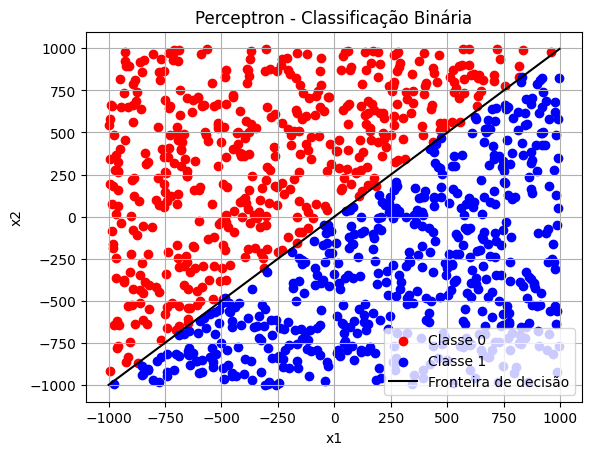

In [7]:
# plotagem
classe_0 = X[y == 0]
classe_1 = X[y == 1]

plt.scatter(classe_0[:, 0], classe_0[:, 1], color='red', label='Classe 0')
plt.scatter(classe_1[:, 0], classe_1[:, 1], color='blue', label='Classe 1')

w = perceptron.get_weights()
x_vals = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_vals = -(w[0] + w[1] * x_vals) / w[2]
plt.plot(x_vals, y_vals, color='black', label='Fronteira de decisão')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Perceptron - Classificação Binária')
plt.grid(True)
plt.show()